# Analyse Job Advertisments
In this notebook a bunch of PDF files that contain job advertisments are analysed with the use of the NLTK library. 

The script reads in a list of PDF files, then tokenize and stem the raw text of the PDFs and finally computes the tf-idf values for a list of keywords with the PDF files as foundation for the idf computation.

In [1]:
import nltk
import string
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

import pandas as pd
from nltk.stem.cistem import Cistem
import PyPDF2 

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [2]:
pdfFolder = "/Users/schaer/sciebo/MSc_DigitalScience/Data and Info Science/KonkurrenzStudiengänge"
txtFolder = "/Users/schaer/sciebo/MSc_DigitalScience/Data and Info Science/Stellenangebote"
rawtext_dict = {}


In [3]:
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = []
    for item in tokens:
        stems.append(Cistem().stem(item))
    return stems

In [4]:
import re
def preprocess(text):
    
    # lowercase
    text = text.lower()
    
    # remove non-ascii chars
    text = text.translate(str.maketrans('', '', string.punctuation+"„“\n"))
    text = re.sub("(\\d|\\W)+"," ",text)
    
    return text

In [16]:
# Read all TXT files
def readJobPosts():
    jobPosts_dict = {}
    for dirpath, dirs, files in os.walk(txtFolder):
        for filename in files:                
            filepath = os.path.join(dirpath, filename)

            with open(filepath, 'r') as textfile:                        
                try:
                    jobPosts = textfile.read().replace('\n', ' ')
                    preprocessed_text = preprocess(jobPosts)
                    jobPosts_dict[filename] = preprocessed_text
                except:
                    print("Error reading file " + filepath)
    return jobPosts_dict


In [7]:
# Read all PDF files
rawtext_dict = {}
numFiles = 0
for dirpath, dirs, files in os.walk(pdfFolder):
    for filename in files: 
        filepath = os.path.join(dirpath, filename)
        with open(filepath, 'rb') as pdffile:            
            try: 
                numFiles += 1
                pdfReader = PyPDF2.PdfFileReader(pdffile) 
                numPages = pdfReader.getNumPages()
                for numPage in range(numPages):
                    pageObj = pdfReader.getPage(numPage) 
                    rawtext = pageObj.extractText()
                    preprocessed_text = preprocess(rawtext)
                    rawtext_dict[filename+str(numPage)] = preprocessed_text
            except:
                print("error in PDF file " + filepath)
                numFiles += 1
            print("Read " + str(numPages) + " pages in file " + filename)    


Read 23 pages in file 201910_Modulhandbuch_DS.albstadtSigmaringen.pdf
Read 54 pages in file Modulhandbuch_Data_Science_Berufsbegleitend_Südwestfalen.pdf
Read 29 pages in file Modulhandbuch_2017-04-04.Beuth.pdf
Read 2 pages in file Master in Applied Data Science Programme Overview Intake 2020.pdf
error in PDF file /Users/schaer/sciebo/MSc_DigitalScience/Data and Info Science/KonkurrenzStudiengänge/Liste Studiengänge Data Science.xlsx
Read 2 pages in file Liste Studiengänge Data Science.xlsx


Read 19 pages in file ModHb_MSc_DaSc_2019.TUDortmund.englisch.pdf
Read 2 pages in file data-science_module.UniSaarland.pdf
error in PDF file /Users/schaer/sciebo/MSc_DigitalScience/Data and Info Science/KonkurrenzStudiengänge/TU_Dortmund.txt
Read 2 pages in file TU_Dortmund.txt


In [220]:
#rawtext_dict

# Compute tf-idf Text Statistics

In [8]:
german_stopwords = ["a","ab","aber","ach","acht","achte","achten","achter","achtes","ag","alle","allein","allem","allen","aller","allerdings","alles","allgemeinen","als","also","am","an","ander","andere","anderem","anderen","anderer","anderes","anderm","andern","anderr","anders","au","auch","auf","aus","ausser","ausserdem","außer","außerdem","b","bald","bei","beide","beiden","beim","beispiel","bekannt","bereits","besonders","besser","besten","bin","bis","bisher","bist","c","d","d.h","da","dabei","dadurch","dafür","dagegen","daher","dahin","dahinter","damals","damit","danach","daneben","dank","dann","daran","darauf","daraus","darf","darfst","darin","darum","darunter","darüber","das","dasein","daselbst","dass","dasselbe","davon","davor","dazu","dazwischen","daß","dein","deine","deinem","deinen","deiner","deines","dem","dementsprechend","demgegenüber","demgemäss","demgemäß","demselben","demzufolge","den","denen","denn","denselben","der","deren","derer","derjenige","derjenigen","dermassen","dermaßen","derselbe","derselben","des","deshalb","desselben","dessen","deswegen","dich","die","diejenige","diejenigen","dies","diese","dieselbe","dieselben","diesem","diesen","dieser","dieses","dir","doch","dort","drei","drin","dritte","dritten","dritter","drittes","du","durch","durchaus","durfte","durften","dürfen","dürft","e","eben","ebenso","ehrlich","ei","ei,","eigen","eigene","eigenen","eigener","eigenes","ein","einander","eine","einem","einen","einer","eines","einig","einige","einigem","einigen","einiger","einiges","einmal","eins","elf","en","ende","endlich","entweder","er","ernst","erst","erste","ersten","erster","erstes","es","etwa","etwas","euch","euer","eure","eurem","euren","eurer","eures","f","folgende","früher","fünf","fünfte","fünften","fünfter","fünftes","für","g","gab","ganz","ganze","ganzen","ganzer","ganzes","gar","gedurft","gegen","gegenüber","gehabt","gehen","geht","gekannt","gekonnt","gemacht","gemocht","gemusst","genug","gerade","gern","gesagt","geschweige","gewesen","gewollt","geworden","gibt","ging","gleich","gott","gross","grosse","grossen","grosser","grosses","groß","große","großen","großer","großes","gut","gute","guter","gutes","h","hab","habe","haben","habt","hast","hat","hatte","hatten","hattest","hattet","heisst","her","heute","hier","hin","hinter","hoch","hätte","hätten","i","ich","ihm","ihn","ihnen","ihr","ihre","ihrem","ihren","ihrer","ihres","im","immer","in","indem","infolgedessen","ins","irgend","ist","j","ja","jahr","jahre","jahren","je","jede","jedem","jeden","jeder","jedermann","jedermanns","jedes","jedoch","jemand","jemandem","jemanden","jene","jenem","jenen","jener","jenes","jetzt","k","kam","kann","kannst","kaum","kein","keine","keinem","keinen","keiner","keines","kleine","kleinen","kleiner","kleines","kommen","kommt","konnte","konnten","kurz","können","könnt","könnte","l","lang","lange","leicht","leide","lieber","los","m","machen","macht","machte","mag","magst","mahn","mal","man","manche","manchem","manchen","mancher","manches","mann","mehr","mein","meine","meinem","meinen","meiner","meines","mensch","menschen","mich","mir","mit","mittel","mochte","mochten","morgen","muss","musst","musste","mussten","muß","mußt","möchte","mögen","möglich","mögt","müssen","müsst","müßt","n","na","nach","nachdem","nahm","natürlich","neben","nein","neue","neuen","neun","neunte","neunten","neunter","neuntes","nicht","nichts","nie","niemand","niemandem","niemanden","noch","nun","nur","o","ob","oben","oder","offen","oft","ohne","ordnung","p","q","r","recht","rechte","rechten","rechter","rechtes","richtig","rund","s","sa","sache","sagt","sagte","sah","satt","schlecht","schluss","schon","sechs","sechste","sechsten","sechster","sechstes","sehr","sei","seid","seien","sein","seine","seinem","seinen","seiner","seines","seit","seitdem","selbst","sich","sie","sieben","siebente","siebenten","siebenter","siebentes","sind","so","solang","solche","solchem","solchen","solcher","solches","soll","sollen","sollst","sollt","sollte","sollten","sondern","sonst","soweit","sowie","später","startseite","statt","steht","suche","t","tag","tage","tagen","tat","teil","tel","tritt","trotzdem","tun","u","uhr","um","und","und?","uns","unse","unsem","unsen","unser","unsere","unserer","unses","unter","v","vergangenen","viel","viele","vielem","vielen","vielleicht","vier","vierte","vierten","vierter","viertes","vom","von","vor","w","wahr?","wann","war","waren","warst","wart","warum","was","weg","wegen","weil","weit","weiter","weitere","weiteren","weiteres","welche","welchem","welchen","welcher","welches","wem","wen","wenig","wenige","weniger","weniges","wenigstens","wenn","wer","werde","werden","werdet","weshalb","wessen","wie","wieder","wieso","will","willst","wir","wird","wirklich","wirst","wissen","wo","woher","wohin","wohl","wollen","wollt","wollte","wollten","worden","wurde","wurden","während","währenddem","währenddessen","wäre","würde","würden","x","y","z","z.b","zehn","zehnte","zehnten","zehnter","zehntes","zeit","zu","zuerst","zugleich","zum","zunächst","zur","zurück","zusammen","zwanzig","zwar","zwei","zweite","zweiten","zweiter","zweites","zwischen","zwölf","über","überhaupt","übrigens"]

# only take terms that occur at max 85% of the documents
cv = CountVectorizer(max_df=0.85,stop_words=german_stopwords)
word_count_vector = cv.fit_transform(rawtext_dict.values())


In [10]:
tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])

# sort ascending
df_idf.sort_values(by=['idf_weights'])

,idf_weights
data,1.242562
science,1.324240
studierenden,1.740400
sws,1.773190
selbststudium,1.789997
...,...
battiti,5.174387
klausurprüfungsvorleistungenbestandene,5.174387
batch,5.174387
bauergüntzel,5.174387


In [12]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=100):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []

    for idx, score in sorted_items:
        fname = feature_names[idx]
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [14]:
# Relative importance of terms in comparisson to the reference corpus

# you only needs to do this once
feature_names=cv.get_feature_names()

# get the document that we want to extract keywords from
doc = ("""Für den gezielten Ausbau unseres Geschäftsbereiches Data Intelligence und für die Realisierung anspruchsvoller Beratungsprojekte im Bereich Datenanalyse suchen wir Sie ab sofort für unsere Standorte München/Karlsruhe/Berlin als
Data Architect/Engineer (m/w/d)
Ihre Aufgaben:

Sie identifizieren, analysieren und validieren Daten(quellen) hinsichtlich ihrer Relevanz zur Vereinfachung und Optimierung von Betriebsabläufen
Sie entwickeln und implementieren mit unseren Kunden Konzepte zur (automatisierten) Bereitstellung, Verwaltung und dem Management von Daten unter Berücksichtigung von Beschränkungen und notwendigen Qualitätsanforderungen
Sie erstellen operative Datenbankarchitekturen und Prozesse (Workflows/Procedures) zum Schutz, zur Integration, Zentralisierung, Aufbereitung, Bearbeitung, Speicherung und Bereitstellung von Daten(quellen)
Sie strukturieren, in Kooperation mit Data Analysten und Scientisten, komplexe Daten aus verschiedenen Datenquellen (z. B. IoT, Sensoren, CRM- & ERP-Systeme)

Ihr Profil:

Bachelor- oder Master-Abschluss in (Wirtschafts-)Informatik oder vergleichbare Studiengänge
Erfahrung mit datengetriebenen Projekten
"Gespür" für Daten und Verständnis von Datensätzen
Neugier darauf, Herausforderungen und Ziele unserer Kunden zu verstehen, um datengetriebene Lösungen aufzuzeigen
Kommunikations- und Teamfähigkeit
Selbständige, strukturierte Arbeitsweise
Technologiebegeistert:
Erfahrung mit ETL-Prozessen, idealerweise für ERP- und CRM-Daten
Experte für Datenmodellierung und Datenarchitekturen sowie den Umgang mit Data Lakes, Data Marts und relationellen Datenbanken
Expertise bei der Anbindung von Schnittstellen (APIs)
Wünschenswert sind Kenntnisse über Programmiersprachen wie z. B. SQL, XML, Python, .NET, Java, Scala, Spark, C#, C++
Erste Erfahrung im Umgang mit Tools wie z.B. Azure Data Factory, Azure IoT, Azure Synapse, MS/Azure SQL DB, Azure Cosmos DB
""")

#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,10)

# now print the results
# importance is 1-tfidf, as we look for 
print("=== Importance of Keywords - lower values  ===")
df_idf = pd.DataFrame()

for k in keywords:
    print(k,keywords[k])

=== Importance of Keywords - lower values  ===
azure 0.485
daten 0.329
erfahrung 0.268
bereitstellung 0.194
sql 0.179
quellen 0.179
erp 0.179
iot 0.168
data 0.14
umgang 0.138


In [31]:
# Read in all job posts

jobPosts = readJobPosts()
keywordStorage = []

for filename,job in jobPosts.items():
    #print(job)
    tf_idf_vector=tfidf_transformer.transform(cv.transform([job]))
    sorted_items=sort_coo(tf_idf_vector.tocoo())
    keywords=extract_topn_from_vector(feature_names,sorted_items,10)
    print("=== Important keywords for job " + filename + " ===")
    #df_idf = pd.DataFrame()

    for k in keywords:
        print(k,keywords[k])
        keywordStorage.append(k)







=== Important keywords for job eventim.txt ===
google 0.323
analysen 0.303
zahlen 0.175
wirtschaftswissenschaften 0.175
vorzugsweise 0.175
systematische 0.175
stark 0.175
neuem 0.175
mitteln 0.175
kern 0.175
=== Important keywords for job ikor.txt ===
apache 0.392
erfahrung 0.278
analyse 0.208
learning 0.2
kenntnisse 0.174
aufgaben 0.165
sas 0.151
prediction 0.151
migration 0.151
mehreren 0.151
=== Important keywords for job immowelt.txt ===
erfahrung 0.31
spark 0.277
arbeiten 0.277
machine 0.266
entwicklung 0.246
kenntnisse 0.194
zusammenarbeit 0.168
möglichkeit 0.168
besitzt 0.168
anwendungsmöglichkeiten 0.168
=== Important keywords for job msg.txt ===
scientist 0.356
lösungen 0.27
bereich 0.245
unterstützen 0.178
sas 0.178
java 0.178
berlin 0.178
data 0.171
verantwortung 0.164
relevante 0.164
=== Important keywords for job BI Team.txt ===
azure 0.431
datenquellen 0.323
erfahrung 0.298
bereitstellung 0.215
sql 0.198
iot 0.186
daten 0.182
data 0.155
umgang 0.153
verwaltung 0.108
=== I

In [32]:
keywordStorage

['google',
 'analysen',
 'zahlen',
 'wirtschaftswissenschaften',
 'vorzugsweise',
 'systematische',
 'stark',
 'neuem',
 'mitteln',
 'kern',
 'apache',
 'erfahrung',
 'analyse',
 'learning',
 'kenntnisse',
 'aufgaben',
 'sas',
 'prediction',
 'migration',
 'mehreren',
 'erfahrung',
 'spark',
 'arbeiten',
 'machine',
 'entwicklung',
 'kenntnisse',
 'zusammenarbeit',
 'möglichkeit',
 'besitzt',
 'anwendungsmöglichkeiten',
 'scientist',
 'lösungen',
 'bereich',
 'unterstützen',
 'sas',
 'java',
 'berlin',
 'data',
 'verantwortung',
 'relevante',
 'azure',
 'datenquellen',
 'erfahrung',
 'bereitstellung',
 'sql',
 'iot',
 'daten',
 'data',
 'umgang',
 'verwaltung',
 'entwicklung',
 'bereich',
 'data',
 'passen',
 'mysql',
 'modernen',
 'java',
 'eigenständige',
 'big',
 'verantwortung',
 'unterstützen',
 'arbeiten',
 'zusammenarbeit',
 'reports',
 'fachbereich',
 'bereitstellung',
 'konfigurieren',
 'geschäftsprozesse',
 'fähigkeiten',
 'fachbereichs',
 'umgang',
 'bereich',
 'management',

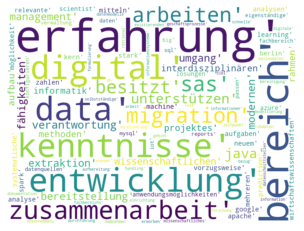

In [48]:
import json
import matplotlib.pyplot as plt

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(german_stopwords)
stopwords.update(["txt","fur","prof"])



# Create and generate a word cloud image:

text = str(keywordStorage)
wordcloud = WordCloud(width=1024,height=768,stopwords=stopwords, background_color="white", max_words=100).generate(text)

wordcloud.to_file("data_science_stellenanzeigen.png")

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [49]:
import collections
counter=collections.Counter(keywordStorage)
print(counter)

print(keywordStorage)


Counter({'erfahrung': 8, 'bereich': 6, 'kenntnisse': 4, 'entwicklung': 4, 'data': 4, 'digital': 4, 'zusammenarbeit': 3, 'sas': 2, 'migration': 2, 'arbeiten': 2, 'besitzt': 2, 'unterstützen': 2, 'java': 2, 'verantwortung': 2, 'bereitstellung': 2, 'umgang': 2, 'modernen': 2, 'fähigkeiten': 2, 'management': 2, 'extraktion': 2, 'wissenschaftlichen': 2, 'interdisziplinären': 2, 'methoden': 2, 'aufbau': 2, 'rahmen': 2, 'projektes': 2, 'informatik': 2, 'google': 1, 'analysen': 1, 'zahlen': 1, 'wirtschaftswissenschaften': 1, 'vorzugsweise': 1, 'systematische': 1, 'stark': 1, 'neuem': 1, 'mitteln': 1, 'kern': 1, 'apache': 1, 'analyse': 1, 'learning': 1, 'aufgaben': 1, 'prediction': 1, 'mehreren': 1, 'spark': 1, 'machine': 1, 'möglichkeit': 1, 'anwendungsmöglichkeiten': 1, 'scientist': 1, 'lösungen': 1, 'berlin': 1, 'relevante': 1, 'azure': 1, 'datenquellen': 1, 'sql': 1, 'iot': 1, 'daten': 1, 'verwaltung': 1, 'passen': 1, 'mysql': 1, 'eigenständige': 1, 'big': 1, 'reports': 1, 'fachbereich': 1,